Imports

In [80]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

Reading dataset from Drive

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
dataset = 'drive/MyDrive/ML/Miniproject/dataset.csv'
df = pd.read_csv(dataset)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19200 entries, 0 to 19199
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19200 non-null  int64  
 1   time [s]    19200 non-null  float64
 2   cfo_meas    19200 non-null  int64  
 3   cfo_demod   19200 non-null  float64
 4   gain_imb    19200 non-null  float64
 5   iq_imb      19200 non-null  float64
 6   or_off      19200 non-null  float64
 7   quadr_err   19200 non-null  float64
 8   ph_err      19200 non-null  float64
 9   mag_err     19200 non-null  float64
 10  evm         19200 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 1.6 MB


In [83]:
df.describe()

,Unnamed: 0,time [s],cfo_meas,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
count,19200.00000,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000
mean,9599.50000,55576.863098,-371.935313,-371.947495,0.044069,-35.193488,-31.121596,0.406988,1.232678,1.832523,2.842527
std,5542.70692,9172.729635,411.673405,412.653152,0.046804,5.399075,3.719265,2.511028,0.240562,0.935943,0.801663
min,0.00000,38570.683000,-1350.000000,-1362.152710,-0.321390,-56.249794,-40.776028,-4.329295,0.855716,0.387086,1.645375
25%,4799.75000,51357.789500,-594.000000,-588.136505,0.007017,-38.700617,-35.152596,-0.701437,1.103122,1.011538,2.232470
50%,9599.50000,56329.446000,-396.000000,-399.890656,0.060500,-33.658566,-29.676680,1.217092,1.207847,1.789461,2.733223
75%,14399.25000,61100.247000,-216.000000,-219.575092,0.078351,-30.964418,-28.147880,2.331270,1.307888,2.393649,3.302256
max,19199.00000,70921.969000,720.000000,737.512390,0.176385,-28.415138,-26.306427,3.340285,11.439541,10.595811,19.152971


Dropping unrelated column `time [s]`

In [84]:
df = df.drop(columns=['time [s]'])

Standardize the features

In [85]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

Silhouette scores to help determine the optimal number of clusters

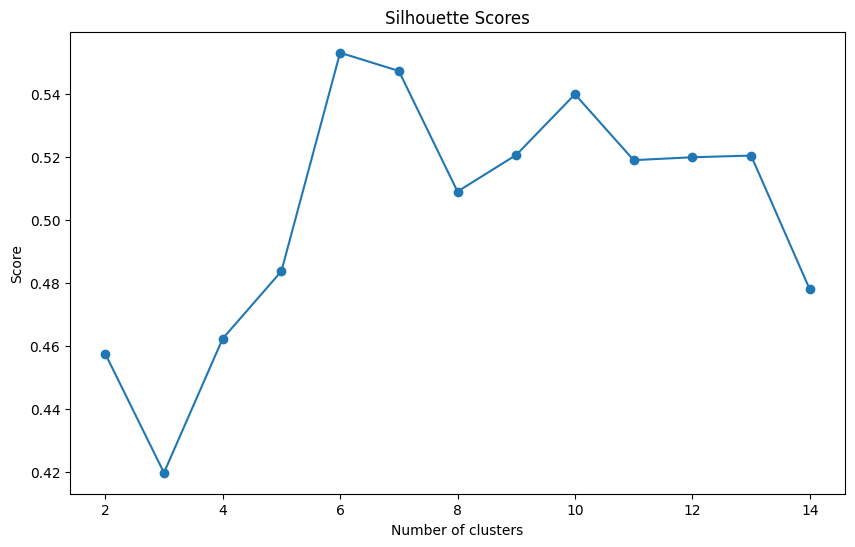

In [86]:
silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    clusters = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, clusters)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

Based on the scores, the optimal number of clusters is **6**.

In [92]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')

Model building and training

In [93]:
model = kmeans.fit(data_scaled)

Assigning the labels (clusters) back to the original data

In [94]:
df['Cluster'] = model.labels_
print(df.groupby('Cluster').mean()) # to view the clusters

           Unnamed: 0    cfo_meas   cfo_demod  gain_imb     iq_imb     or_off  \
Cluster                                                                         
0        14531.886394 -309.237439 -309.571375  0.076153 -34.832204 -29.504231   
1         8404.258111 -373.451331 -373.195194 -0.027385 -29.824938 -36.915975   
2         2081.552279 -398.171582 -397.411141  0.067195 -45.941784 -27.440290   
3        17982.053616  459.201995  459.017013  0.068749 -34.699253 -28.554645   
4         8536.793986 -943.043478 -943.620144  0.082947 -38.886206 -28.009903   
5         3654.593543 -703.244205 -703.279236  0.037362 -31.664761 -32.305941   

         quadr_err    ph_err   mag_err       evm  
Cluster                                           
0         2.127464  1.214802  1.642107  2.676223  
1        -3.691372  1.404538  3.101698  3.858219  
2         0.351820  1.069981  0.523183  1.908468  
3         2.061410  1.089835  1.556529  2.434912  
4         1.181008  1.119352  0.984594  2.165